이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 데이터의 분리 튜토리얼 자료입니다.  
링크 : https://wikidocs.net/33274

## **02-09 데이터의 분리(Splitting Data)**
---

머신 러닝 모델을 학습시키고 평가하기 위해서는 데이터를 적절하게 분리하는 작업이 필요합니다. 이 책에서는 대부분의 경우에서 지도 학습(Supervised Learning)을 다루는데, 이번에는 지도 학습을 위한 데이터 분리 작업에 대해서 배웁니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

---
### **1. 지도 학습(Supervised Learning)**
---
지도 학습의 훈련 데이터는 문제지를 연상케 합니다. 지도 학습의 훈련 데이터는 정답이 무엇인지 맞춰 하는 '문제'에 해당되는 데이터와 레이블이라고 부르는 '정답'이 적혀있는 데이터로 구성되어 있습니다. 쉽게 비유하면, 기계는 정답이 적혀져 있는 문제지를 문제와 정답을 함께 보면서 열심히 공부하고, 향후에 정답이 없는 문제에 대해서도 정답을 잘 예측해야 합니다.

예를 들어 **스팸 메일 분류기** 를 위한 데이터 같은 경우에는 메일의 본문과 해당 메일이 정상 메일인지, 스팸 메일인지 적혀있는 레이블로 구성되어져 있습니다. 예를 들어 아래와 같은 형식의 데이터가 약 20,000개 있다고 가정해보겠습니다. 이 데이터는 두 개의 열로 구성되는데, 바로 메일의 본문에 해당되는 첫번째 열과 해당 메일이 정상 메일인지 스팸 메일인지가 적혀있는 정답에 해당되는 두번째 열입니다. 그리고 이러한 데이터 배열이 총 20,000개의 행을 가집니다.

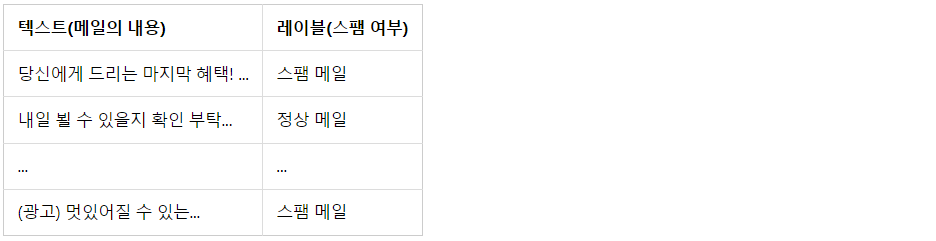

기계를 지도하는 선생님의 입장이 되어보겠습니다. 기계를 훈련시키기 위해서 데이터를 총 4개로 나눕니다. 우선 메일의 내용이 담긴 첫번째 열을 X에 저장합니다. 그리고 메일이 스팸인지 정상인지 정답이 적혀있는 두번째 열을 y에 저장합니다. 이제 문제지에 해당되는 20,000개의 X와 정답지에 해당되는 20,000개의 y가 생겼습니다.

그리고 이제 이 X와 y에 대해서 일부 데이터를 또 다시 분리합니다. 이는 문제지를 다 공부하고나서 실력을 평가하기 위해서 시험(test)용으로 일부로 일부 문제와 해당 문제의 정답지를 분리해놓는 것입니다. 여기서는 2,000개를 분리한다고 가정하겠습니다. 이때 분리 시에는 여전히 X와 y의 맵핑 관계를 유지해야 합니다. 어떤 X(문제)에 대한 어떤 y(정답)인지 바로 찾을 수 있어야 합니다. 이렇게 되면 학습용에 해당되는 18,000개의 X, y의 쌍과 시험용에 해당되는 2000개의 X, y의 쌍이 생깁니다 이 책에서는 이 유형의 데이터들에게 일반적으로 다음과 같은 변수명을 부여합니다.

**<훈련 데이터>**  
X_train : 문제지 데이터  
y_train : 문제지에 대한 정답 데이터.
  
    
**<테스트 데이터>**  
X_test : 시험지 데이터.  
y_test : 시험지에 대한 정답 데이터.  
  
기계는 이제부터 X_train과 y_train에 대해서 학습을 합니다. 기계는 학습 상태에서는 정답지인 y_train을 볼 수 있기 때문에 18,000개의 문제지 X_train과 y_train을 함께 보면서 어떤 메일 내용일 때 정상 메일인지 스팸 메일인지를 열심히 규칙을 도출해나가면서 정리해나갑니다. 그리고 학습을 다 한 기계에게 y_test는 보여주지 않고, X_test에 대해서 정답을 예측하게 합니다. 그리고 기계가 예측한 답과 실제 정답인 y_test를 비교하면서 기계가 정답을 얼마나 맞췄는지를 평가합니다. 이 수치가 기계의 **정확도(Accuracy)** 가 됩니다.

---
### **2. X와 y분리하기**
---

#### **1) zip 함수를 이용하여 분리하기**
zip()함수는 동일한 개수를 가지는 시퀀스 자료형에서 각 순서에 등장하는 원소들끼리 묶어주는 역할을 합니다. 리스트의 리스트 구성에서 zip 함수는 X와 y를 분리하는데 유용합니다. 우선 zip 함수가 어떤 역할을 하는지 확인해보도록 하겠습니다.

In [2]:
X, y = zip(['a', 1], ['b', 2], ['c', 3])
print('X 데이터 :', X)
print('y 데이터 :', y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


각 데이터에서 첫번째로 등장한 원소들끼리 묶이고, 두번째로 등장한 원소들끼리 묶인 것을 볼 수 있습니다.

In [3]:
# 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서.
sequences = [['a', 1], ['b', 2], ['c', 3]]
X, y = zip(*sequences)
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


각 데이터에서 첫번째로 등장한 원소들끼리 묶이고, 두번째로 등장한 원소들끼리 묶인 것을 볼 수 있습니다. 이를 각각 X데이터와 y데이터로 사용할 수 있습니다.

#### **2) 데이터프레임을 이용하여 분리하기**

In [4]:
values = [['당신에게 드리는 마지막 혜택!', 1],
          ['내일 뵐 수 있을지 확인 부탁드...', 0],
          ['도연씨. 잘 지내시죠? 오랜만입...', 0],
          ['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


데이터프레임은 열의 이름으로 각 열에 접근이 가능하므로, 이를 이용하면 손쉽게 X 데이터와 y 데이터를 분리할 수 있습니다.

In [5]:
X = df['메일 본문']
y = df['스팸 메일 유무']
X

0          당신에게 드리는 마지막 혜택!
1      내일 뵐 수 있을지 확인 부탁드...
2      도연씨. 잘 지내시죠? 오랜만입...
3    (광고) AI로 주가를 예측할 수 있다!
Name: 메일 본문, dtype: object

In [6]:
y

0    1
1    0
2    0
3    1
Name: 스팸 메일 유무, dtype: int64

X와 y데이터를 출력해보겠습니다.

In [7]:
print('X 데이터 :', X.to_list())
print('y 데이터 :', y.to_list())

X 데이터 : ['당신에게 드리는 마지막 혜택!', '내일 뵐 수 있을지 확인 부탁드...', '도연씨. 잘 지내시죠? 오랜만입...', '(광고) AI로 주가를 예측할 수 있다!']
y 데이터 : [1, 0, 0, 1]


#### **3) Numpy를 이용하여 분리하기**
임의의 데이터를 만들어서 Numpy의 슬라이싱(slicing)을 사용하여 데이터를 분리해봅시다.

In [8]:
np_array = np.arange(0,16).reshape((4,4))
print('전체 데이터 :')
print(np_array)

전체 데이터 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


마지막 열을 제외하고 X데이터에 저장합니다. 마지막 열만을 y데이터에 저장합니다.

In [9]:
X = np_array[:, :3]
y = np_array[:, 3]

print('X 데이터 :')
print(X)
print('y 데이터 :',y)

X 데이터 :
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
y 데이터 : [ 3  7 11 15]


---
### **3. 테스트 데이터 분리하기**
---
이번에는 이미 X와 y가 분리된 데이터에 대해서 테스트 데이터를 분리하는 과정에 대해서 알아보겠습니다.

#### **1) 사이킷 런을 이용하여 분리하기**
사이킷런은 학습용 테스트와 테스트용 데이터를 쉽게 분리할 수 있게 해주는 train_test_split()를 지원합니다.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3, 3), (3,), (1, 3), (1,))

각 인자는 다음을 의미합니다. train_size와 test_size는 둘 중 하나만 기재해도 됩니다.

* X : 독립 변수 데이터. (배열이나 데이터프레임)  
* y : 종속 변수 데이터. 레이블 데이터.  
* test_size : 테스트용 데이터 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.  
* train_size : 학습용 데이터의 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.  
* random_state : 난수 시드  
  
예를 들어보겠습니다. 임의로 X 데이터와 y 데이터를 생성했습니다.

In [11]:
# 임의로 X와 y 데이터를 생성
X, y = np.arange(10).reshape((5, 2)), range(5)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y 전체 데이터 :
[0, 1, 2, 3, 4]


여기서는 7:3의 비율로 데이터를 분리합니다. train_test_split()은 기본적으로 데이터의 순서를 섞고나서 훈련 데이터와 테스트 데이터를 분리합니다. 만약, random_state의 값을 특정 숫자로 기재해준 뒤에 다음에도 동일한 숫자로 기재해주면 항상 동일한 훈련 데이터와 테스트 데이터를 얻을 수 있습니다. 하지만 값을 변경하면 다른 순서로 섞인 채 분리되므로 이전과 다른 훈련 데이터와 테스트 데이터를 얻습니다. 실습을 통해서 이해해봅시다. random_state 값을 임의로 1234로 지정했습니다.

In [12]:
# 7:3의 비율로 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

70%의 비율로 분리된 X의 훈련 데이터와 30%의 비율로 분리된 X의 테스트 데이터입니다.

In [13]:
print('X 훈련 데이터 :')
print(X_train)
print('X 테스트 데이터 :')
print(X_test)

X 훈련 데이터 :
[[2 3]
 [4 5]
 [6 7]]
X 테스트 데이터 :
[[8 9]
 [0 1]]


70%의 비율로 분리된 y의 훈련 데이터와 30%의 비율로 분리된 y의 테스트 데이터입니다.

In [14]:
print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


출력 결과를 보면 데이터를 어느 중간 부분에서 앞과 뒤로 자른 것이 아니라 앞에 있던 샘플이 뒤로 가기도하고, 데이터의 순서가 전반적으로 섞이면서 분리된 것을 확인할 수 있습니다. random_state의 의미를 이해하기 위해서 이번에는 random_state의 값을 임의로 다른 값인 1을 주고 다시 분리해보겠습니다. 그리고 y데이터를 출력해봅시다.

In [15]:
# random_state의 값을 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[4, 0, 3]
y 테스트 데이터 :
[2, 1]


random_state 값이 1234일 때와 전혀 다른 y데이터가 출력됩니다. 데이터가 다른 순서로 섞였다는 의미입니다. 이번에는 다시 random_state의 값을 1234로 주고 다시 y데이터를 출력해봅시다.

In [16]:
# random_state을 이전의 값이었던 1234로 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


이전과 동일한 y데이터가 출력됩니다. random_state의 값을 고정해두면 실행할 때마다 항상 동일한 순서로 데이터를 섞으므로, 동일한 코드를 다음에 재현하고자 할 때 사용할 수 있습니다.

#### **2) 수동으로 분리하기**
데이터를 분리하는 방법 중 하나는 수동으로 분리하는 것입니다. 우선 임의로 X 데이터와 y 데이터를 만들어보겠습니다.

In [17]:
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
X, y = np.arange(0, 24).reshape((12, 2)), range(12)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


훈련 데이터의 개수와 테스트 데이터의 개수를 정해보겠습니다. num_of_train은 훈련 데이터의 개수를 의미하며, num_of_test는 테스트 데이터의 개수를 의미합니다.

In [18]:
num_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
num_of_test = int(len(X) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print('훈련 데이터의 크기 :',num_of_train)
print('테스트 데이터의 크기 :',num_of_test)

훈련 데이터의 크기 : 9
테스트 데이터의 크기 : 3


아직 훈련 데이터와 테스트 데이터를 나눈 것이 아니라 이 두 개의 개수를 몇 개로 할지 정하기만 한 상태입니다. 여기서 num_of_test를 len(X) * 0.2로 계산해서는 안 됩니다. 데이터에 누락이 발생할 수 있습니다. 예를 들어서 전체 데이터의 개수가 4,518이라고 가정했을 때 4,518의 80%의 값은 3,614.4로 소수점을 내리면 3,614가 됩니다. 또한 4,518의 20%의 값은 903.6으로 소수점을 내리면 903이 됩니다. 그리고 3,614 + 903 = 4517이므로 데이터 1개가 누락이 됩니다. 그러므로 어느 한 쪽을 먼저 계산하고 그 값만큼 제외하는 방식으로 계산해야 합니다.

In [19]:
X_test = X[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장

데이터를 나눌 때는 num_of_train와 같이 하나의 변수만 사용하면 데이터의 누락을 방지할 수 있습니다. 앞에서 구한 데이터의 개수만큼 훈련 데이터와 테스트 데이터를 분할합니다. 그리고 테스트 데이터를 출력하여 정상적으로 분리되었는지 확인합니다.

In [20]:
print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
[[18 19]
 [20 21]
 [22 23]]
y 테스트 데이터 :
[9, 10, 11]


각 길이가 3인 것을 확인했습니다. train_test_split()과 다른 점은 데이터가 섞이지 않은 채 어느 지점에서 데이터를 앞과 뒤로 분리했다는 점입니다. 만약, 수동으로 분리하게 된다면 데이터를 분리하기 전에 수동으로 데이터를 섞는 과정이 필요할 수 있습니다. 실제로 뒤에서 이러한 실습들을 진행합니다.